## Step 1:Importing libraries

In [78]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, r2_score

## Step 2:Loading the dataset 

In [22]:
df = pd.read_csv("\\Users\\namra\\Downloads\\customer_churn.csv")

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 3:Dataset preprocessing

In [24]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
#statistics 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Dataset Shape:

In [26]:
df.shape

(7043, 21)

### Checking the Missing Values

In [27]:
#checking whether the coloumn has null values are not
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df.shape

(7043, 21)

In [29]:
#displaying columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols =df.columns
# Apply label encoding to each categorical column
for column in cols:
    df[column] = le.fit_transform(df[column])

# Step 4:Exploratory Data Analysis

### Histrogram

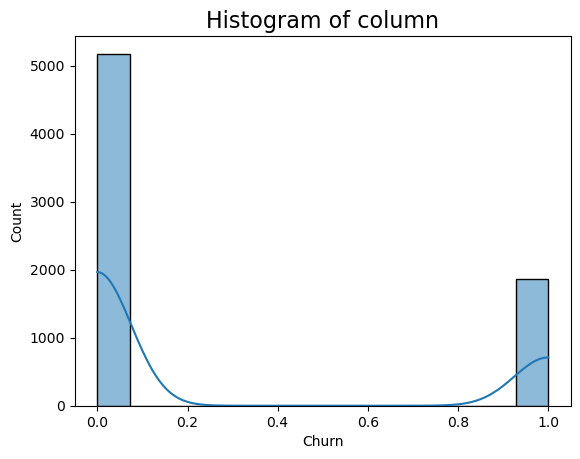

In [31]:
#plotting the distribution of 'Churn' column with kernel density estimation(KDE)
sns.histplot(df['Churn'], kde=True)
plt.title('Histogram of column',fontsize=16)
plt.show()

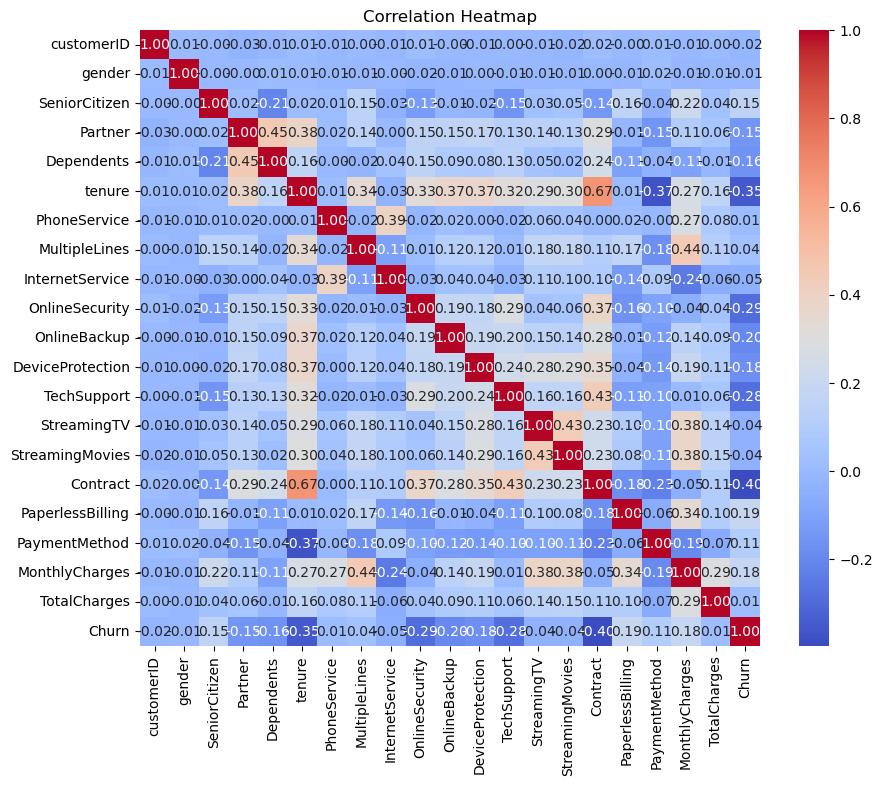

In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

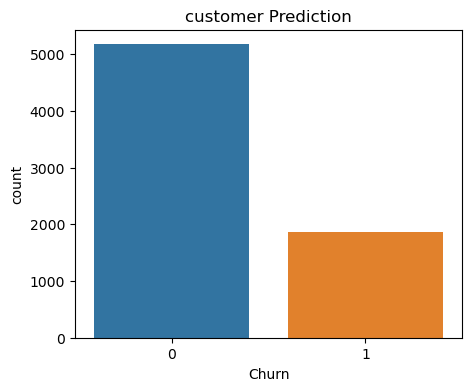

In [33]:
# Distribution of quality scores
plt.figure(figsize=(5, 4))
sns.countplot(x='Churn', data=df)
plt.title('customer Prediction')
plt.show()

## scatterplot

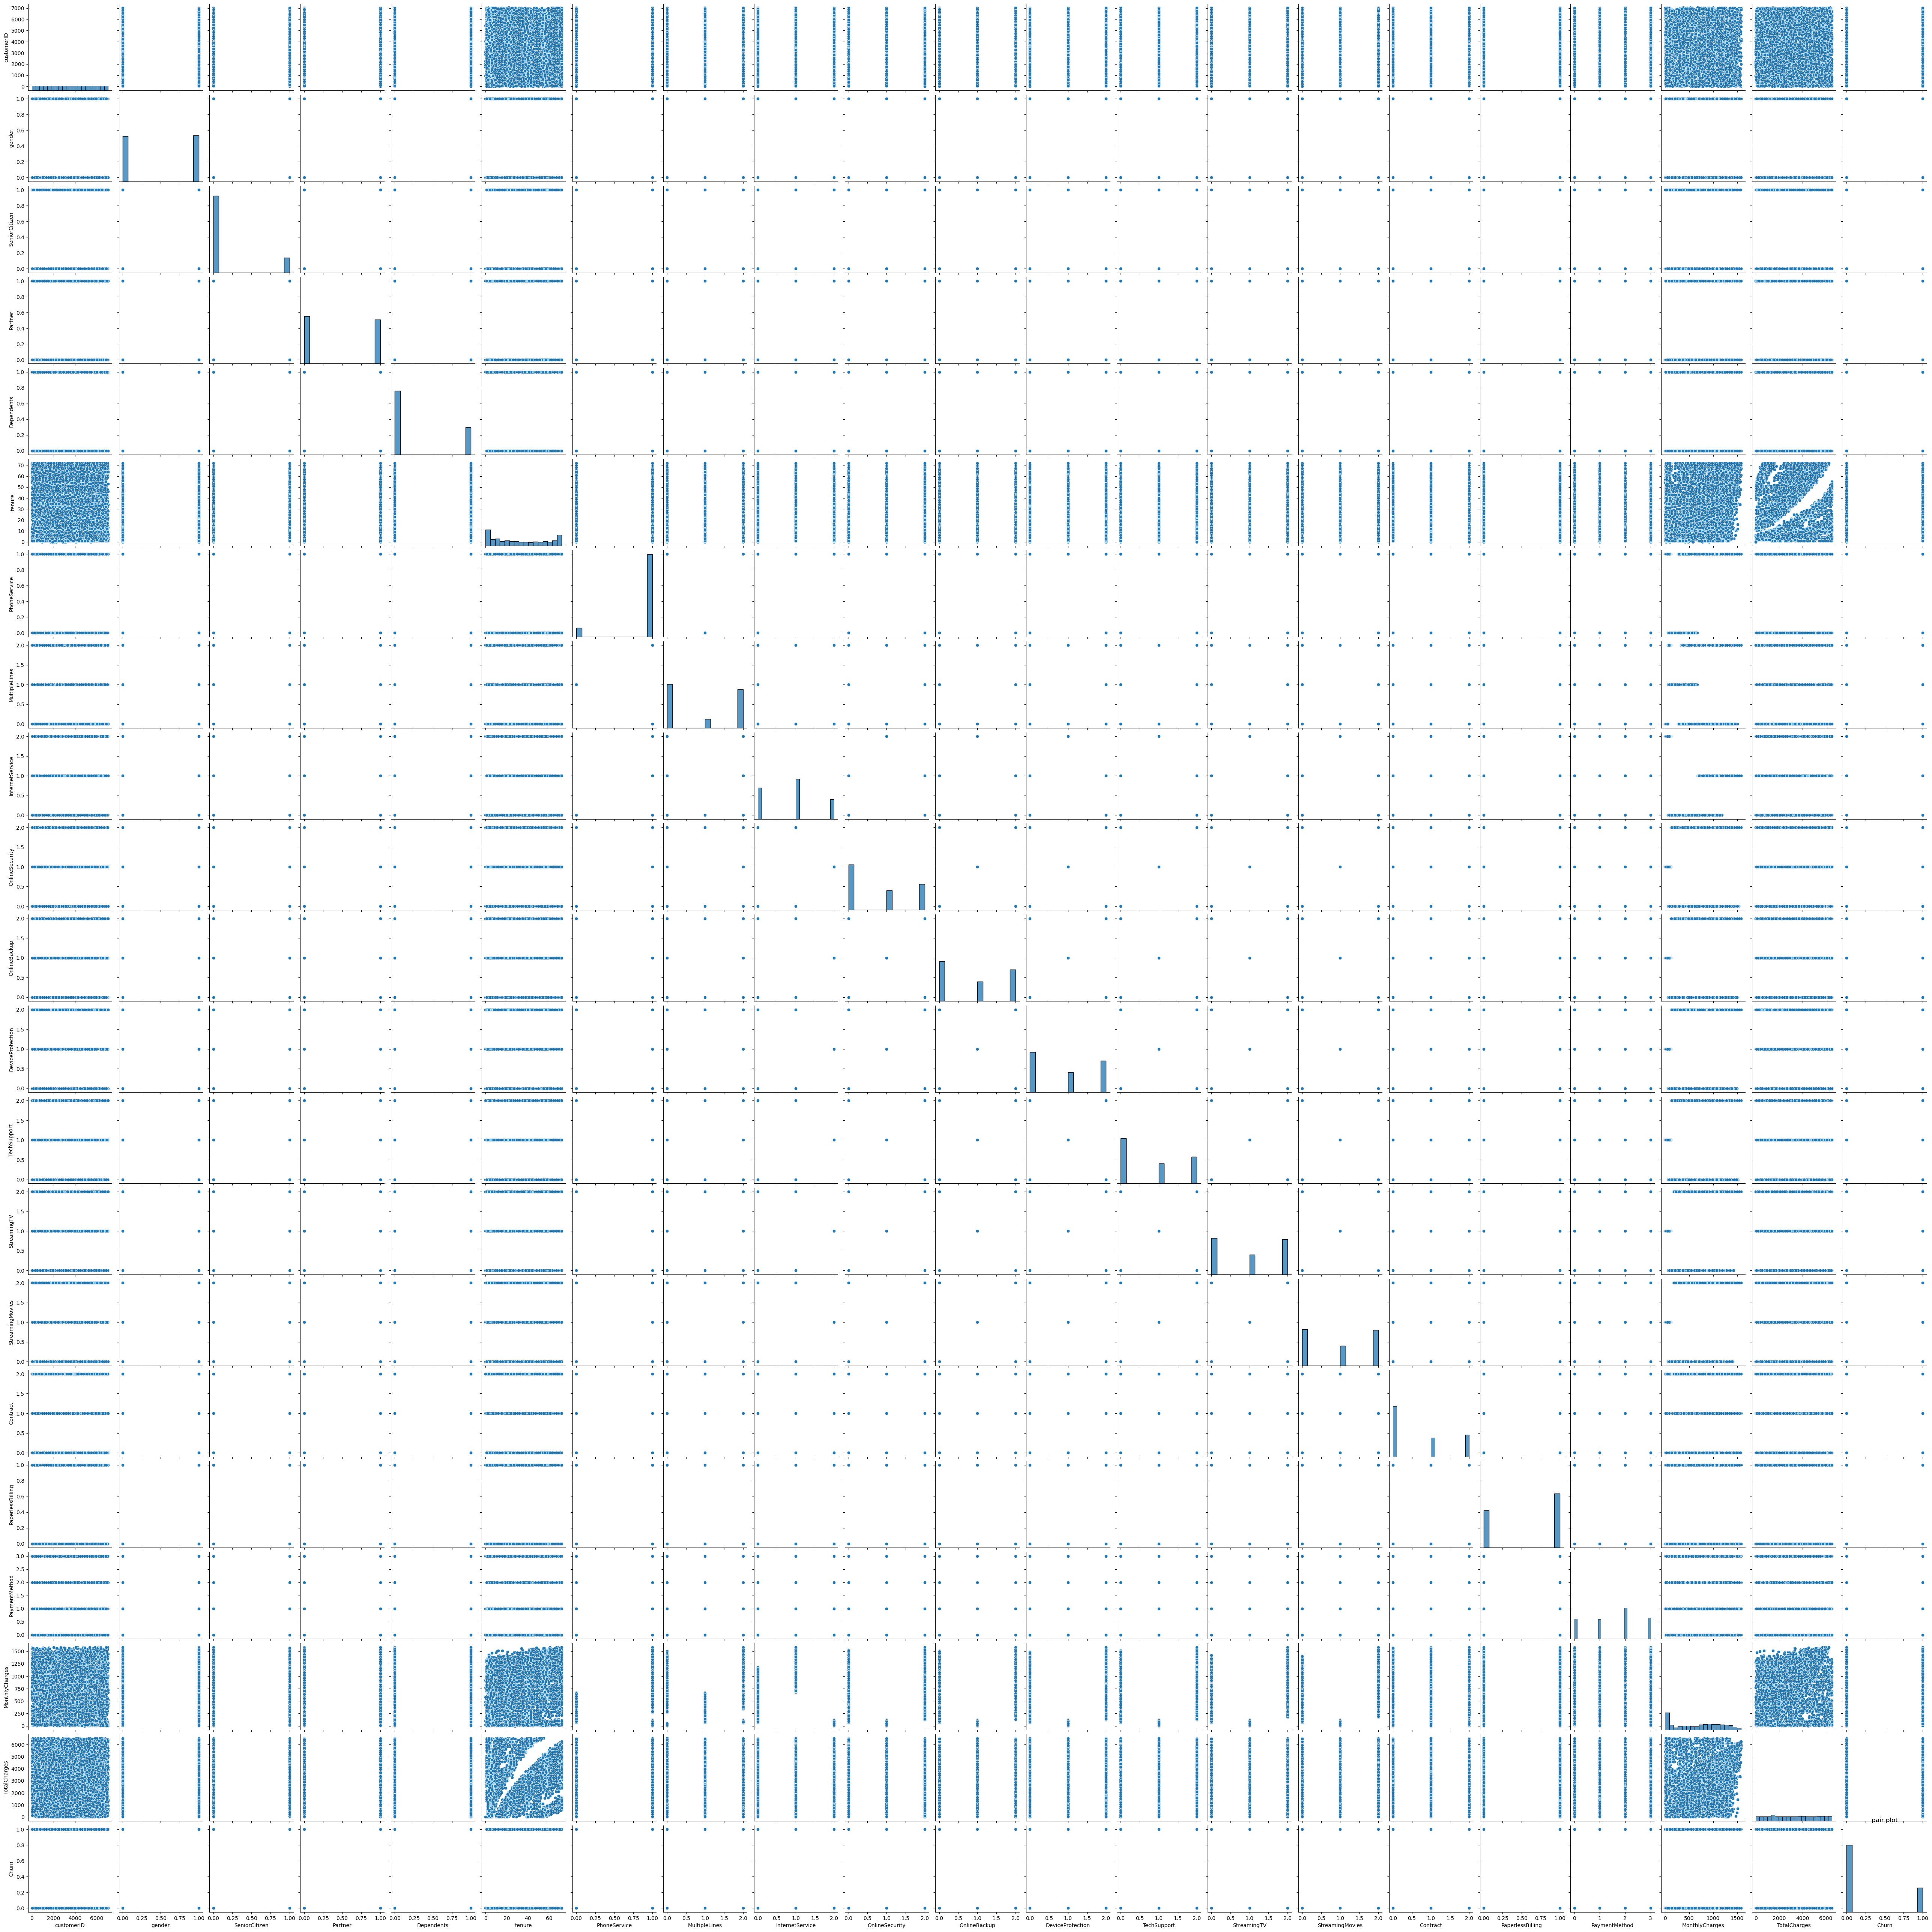

In [34]:
sns.pairplot(df)
plt.title('pair plot')
plt.show()


### 5.Divide the data X and y variables

In [35]:
#dividing the data X and y variables
X = df.drop(['Churn'],axis=True)
y = df['Churn']

### 6.Splitting the dataset into Training set and Test set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
# Displaying the shape of train set and test set
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4930, 20), (2113, 20), (4930,), (2113,))

## 7.Training the models

In [40]:
c = LogisticRegression(C=1.0)
c.fit(X_train, y_train)

LogisticRegression()

### 8.Predicting the test set results

In [42]:
# Make predictions of linear regressor on test data
y_pred = c.predict(X_test)

In [43]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Churn","Predict Churn"])
calculation.tail(1000)

,Original Churn,Predict Churn
1113,0,0
1114,0,0
1115,1,1
1116,0,0
1117,0,0
...,...,...
2108,1,1
2109,0,0
2110,0,0
2111,0,0


In [48]:
#computing accuracy of logistic regressor
X_pred = c.predict(X_train)   

In [50]:
accuracy_score_train= accuracy_score(y_train,X_pred)

In [51]:
#printing training accuracy of logistic regression
print("Accuracy score of training data: " + str(accuracy_score_train))

Accuracy score of training data: 0.8012170385395537


In [52]:
accuracy_score_test= accuracy_score(y_test,y_pred)

In [53]:
#printing testing accuracy of logistic regression
print("Accuracy score of testing data: " + str(accuracy_score_test))

Accuracy score of testing data: 0.7931850449597728


## Decision tree classifier

In [54]:
# Initialize the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [58]:
# Train the decision treen model
c = DT.fit(X_train,y_train)

In [61]:
# Predict on the test set
y_pred = c.predict(X_test)

In [65]:
#computing accuracy of DecisionTree
print("Testing Accuracy of decision tree :", c.score(X_test, y_test))

Testing Accuracy of decision tree : 0.7458589682915286


In [66]:
#importing the library
from sklearn import tree

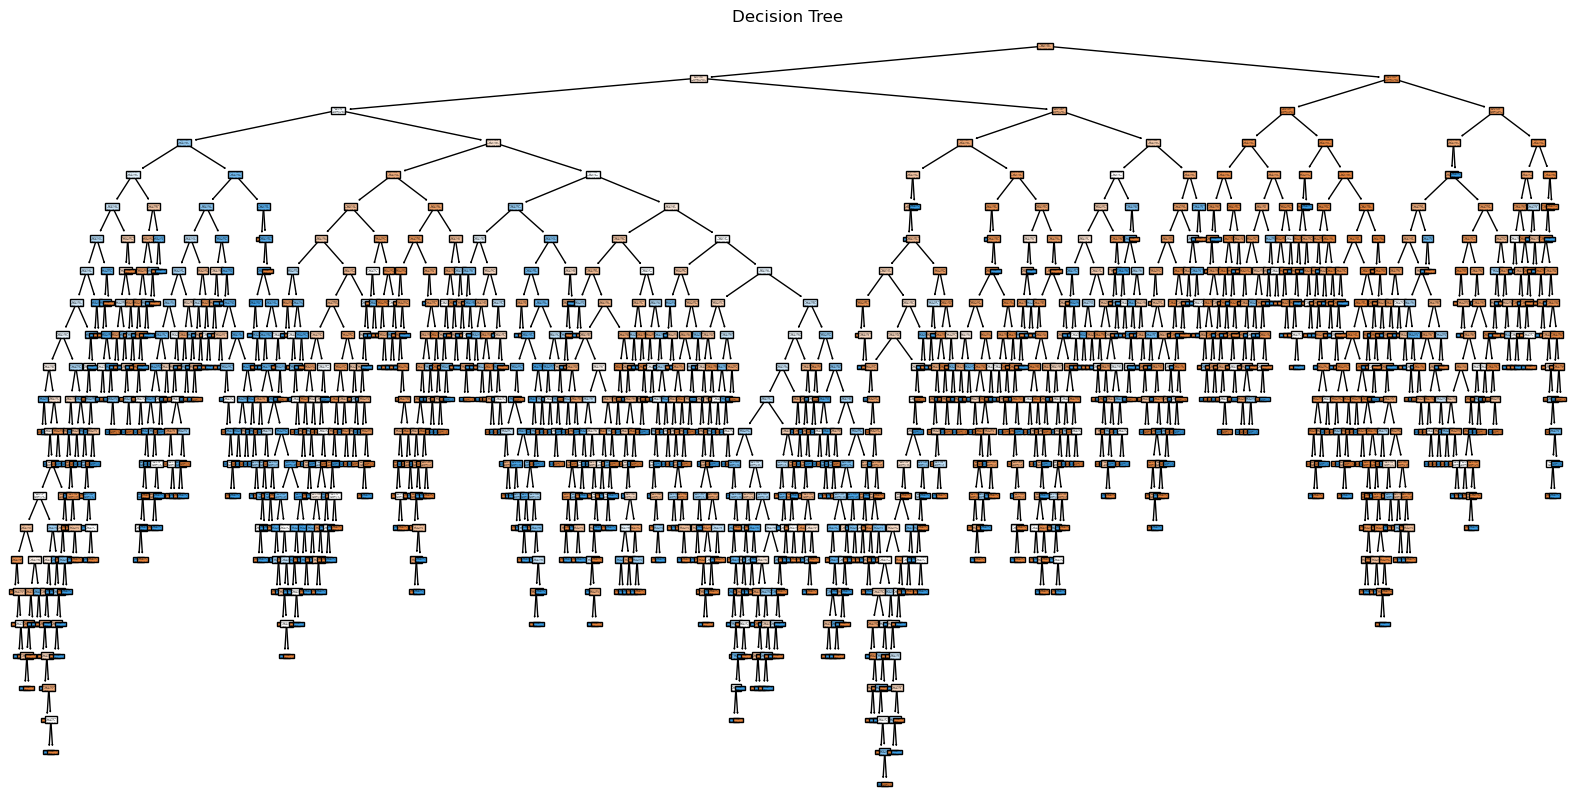

In [67]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(c, filled=True)
plt.title("Decision Tree")
plt.show()

### Training KNN model

In [73]:
# KNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier
c= KNeighborsClassifier() 
c.fit(X_train,y_train)

KNeighborsClassifier()

In [79]:
#make predictions of KNN classifier on the test set
y_pred = c.predict(X_test)

In [80]:
#computing accuracy of KNN Regressor
print("Testing Accuracy :", c.score(X_test, y_test))

Testing Accuracy : 0.7283483199242783


### 9.Evaluate the model

### 10.Visualize the results

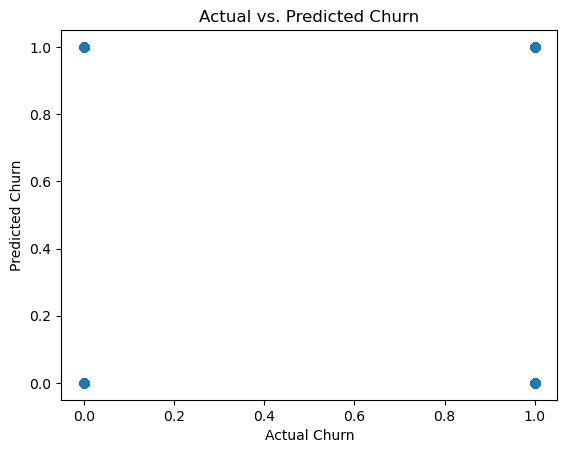

In [81]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn')
plt.title('Actual vs. Predicted Churn')
plt.show()